# Eclat

# 1-Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)


# 2-Explore Data

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie
1,burgers,meatballs,eggs,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice,whole wheat rice
2,chutney,avocado,energy bar,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs,eggs
3,turkey,milk,shallot,honey,honey,honey,honey,honey,honey,honey,honey,honey,honey,honey,honey,honey,honey,honey
4,mineral water,french fries,green tea,spaghetti,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea,green tea


In [5]:
df.shape

(7493, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7493 non-null   object
 1   1       7493 non-null   object
 2   2       7493 non-null   object
 3   3       7493 non-null   object
 4   4       7493 non-null   object
 5   5       7493 non-null   object
 6   6       7493 non-null   object
 7   7       7493 non-null   object
 8   8       7493 non-null   object
 9   9       7493 non-null   object
 10  10      7493 non-null   object
 11  11      7493 non-null   object
 12  12      7493 non-null   object
 13  13      7493 non-null   object
 14  14      7493 non-null   object
 15  15      7493 non-null   object
 16  16      7493 non-null   object
 17  17      7493 non-null   object
dtypes: object(18)
memory usage: 1.0+ MB


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493,7493
unique,115,117,118,119,119,118,116,119,117,118,116,116,117,115,116,115,115,115
top,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water,mineral water
freq,577,613,633,517,447,481,501,508,525,547,552,556,562,563,567,568,570,570


In [9]:
nu=df.isnull().sum()
nu[nu>0]

Series([], dtype: int64)

<AxesSubplot:>

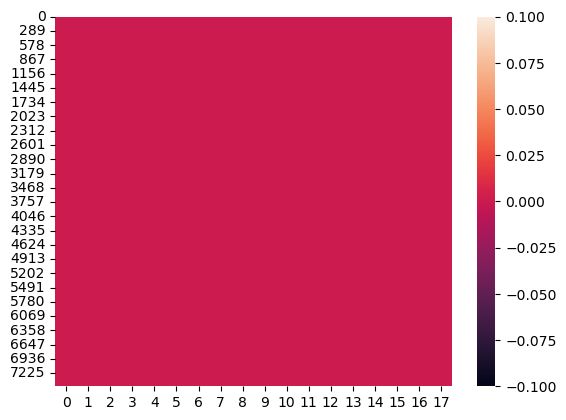

In [11]:
sns.heatmap(df.isnull())

# 3- Visualising items' frequencies


<AxesSubplot:title={'center':'Relative Frequency'}>

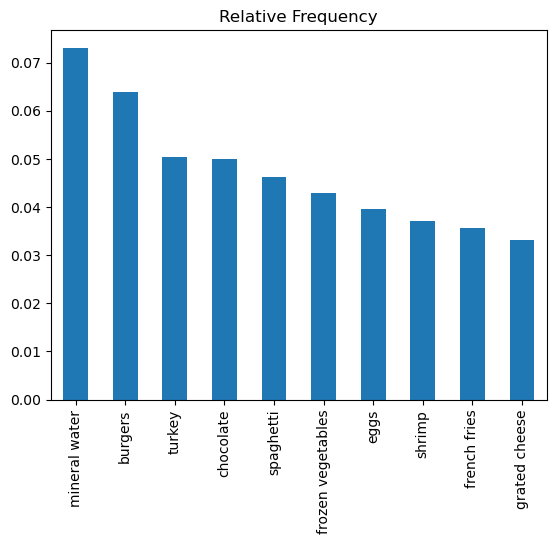

In [17]:
df.stack().value_counts(normalize=True)[:10].plot(kind='bar', title='Relative Frequency')

<AxesSubplot:title={'center':'Frequency'}>

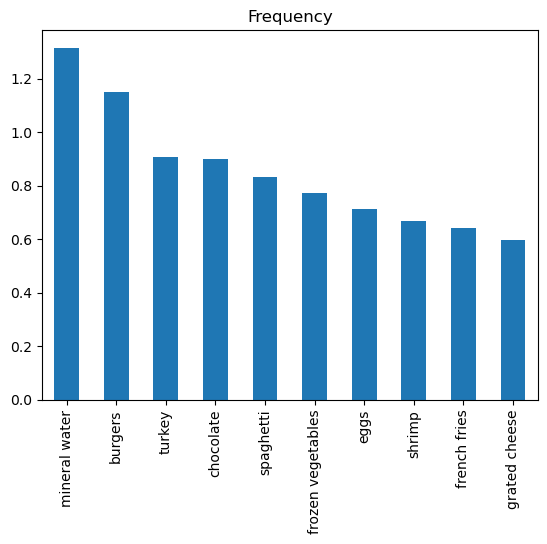

In [18]:
df.stack().value_counts().apply(lambda item: item / df.shape[0])[:10].plot(kind='bar', title='Frequency') # Frequency

# 4- Formatting the dataset


In [19]:
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)
transactions[:10]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie'],
 ['burgers',
  'meatballs',
  'eggs',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice',
  'whole wheat rice'],
 ['chutney',
  'avocado',
  'energy bar',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs',
  'eggs'],
 ['turkey',
  'milk',
  'shallot',
  'honey',
  'honey',
  'honey',
  'honey',
  'honey',
  'honey',
  'honey',
  'honey',
  'honey',
  'hone

# 5-Building the model


In [27]:
#!pip install apyori
from apyori import apriori
rules = apriori(transactions=transactions, 
                min_support=0.004, # how frequent is your item(s) in the dataset
                min_length=2, 
                max_length=0)
results = list(rules)
#results

# 6- Organizing the model's output

In [23]:
def inspect(results):
    item_sets = []
    supports = [] 
    for result in results:
        item_sets.append(tuple(result[0]))
        supports.append(result[1])
    return list(zip(item_sets, supports))
results_df = pd.DataFrame(inspect(results),
                          columns = ['Item Set', 'Support'])

In [24]:
pd.set_option('display.max_rows', df.shape[0])
results_df.sort_values('Support', ascending=False)[:100]

,Item Set,Support
70,"(mineral water,)",0.486454
14,"(burgers,)",0.405579
24,"(chocolate,)",0.362338
97,"(spaghetti,)",0.349793
106,"(turkey,)",0.322301
35,"(eggs,)",0.318297
47,"(frozen vegetables,)",0.300814
41,"(french fries,)",0.297878
94,"(shrimp,)",0.262512
29,"(cookies,)",0.234352
